# Structure of the alongshore velocity and density

### Comparison between forcing with body force, low body force and fixed boundaries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import xarray as xr

In [2]:
def calc_rho(RhoRef,T,S,alpha=2.0E-4, beta=7.4E-4):
    """-----------------------------------------------------------------------------
    calc_rho calculates the density using a linear equation of state.
    
    INPUT:
    RhoRef : reference density at the same z as T and S slices. Can be a scalar or a 
             vector, depending on the size of T and S.
    T, S   : should be at least 2D arrays in coordinate order (..., Y , X ) 
    alpha = 2.0E-4 # 1/degC, thermal expansion coefficient
    beta = 7.4E-4, haline expansion coefficient
    OUTPUT:
    rho - Density [...,ny,nx]
    -----------------------------------------------------------------------------"""
    
    #Linear eq. of state 
    rho = RhoRef*(np.ones(np.shape(T)) - alpha*(T[...,:,:]) + beta*(S[...,:,:]))
    return rho


def call_rho(t,xind,stateDataset):
    T = stateDataset.Temp.isel(T=t,X=xind)
    S = stateDataset.S.isel(T=t,X=xind)
    rho = calc_rho(RhoRef,T,S,alpha=2.0E-4, beta=7.4E-4)
    return(rho) 

def plot_isopyc(t,xind,ax,stateDataset,yslice,zslice,rho_min=1020.4,rho_max=1024.4):
    density = call_rho(t,xind,stateDataset)
    csU2 = np.linspace(rho_min,rho_max,num=20)
    CS = ax.contour(grid.Y[yslice]/1000,grid.Z[zslice],
                    np.ma.array(density[zslice,yslice].data,mask=MaskC[zslice,yslice,xind]),
                    csU2,colors='k',linewidths=[0.75] )
    plt.clabel(CS,csU2[1::2],fontsize=8,fmt='%.1f')

In [3]:
# grid files
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid = xr.open_dataset(grid_file)

# State and ptracer files for run spindown
state_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/FORCING_SPNDN/run01/stateGlob.nc'
ptracers_file01 = '/ocean/kramosmu/MITgcm/TracerExperiments/FORCING_SPNDN/run01/ptracersGlob.nc'

state_01 = xr.open_dataset(state_file01)
ptracers_01 = xr.open_dataset(ptracers_file01)

# files for original run with body forcing
state_file_bf = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
ptracers_file_bf = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'

state_bf = xr.open_dataset(state_file_bf)
ptracers_bf = xr.open_dataset(ptracers_file_bf)

# files for run with fixed u,v boundaries
state_file_fix = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run06/stateGlob.nc' 
ptracers_file_fix = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run06/ptracersGlob.nc'

state_fix = xr.open_dataset(state_file_fix)
ptracers_fix = xr.open_dataset(ptracers_file_fix)

# State and ptracer files for run low body forcing
state_file_Low = '/ocean/kramosmu/MITgcm/TracerExperiments/LESS_BF/run01/stateGlob.nc'
ptracers_file_Low = '/ocean/kramosmu/MITgcm/TracerExperiments/LESS_BF/run01/ptracersGlob.nc'

state_low = xr.open_dataset(state_file_Low)
ptracers_low = xr.open_dataset(ptracers_file_Low)



In [4]:
# Reference density
RhoRef = 999.79998779 # It is constant in all my runs, can't run rdmds

In [11]:
hFacWmasked = np.ma.masked_values(grid.HFacW.data, 0)
maskW = np.ma.getmask(hFacWmasked)

hFacCmasked = np.ma.masked_values(grid.HFacC.data, 0)
MaskC = np.ma.getmask(hFacCmasked)

hFacSmasked = np.ma.masked_values(grid.HFacS.data, 0)
maskS = np.ma.getmask(hFacSmasked)

 ###  Upstream U and V for base case, low bf case, fixed boundaries day 4, day 6 and day 8
 Day 2 is within the time dependent phase for the body forcing cases; day 4 is when I start counting the advective phase; day 6 is in the middle of the advective phase and day 8 at the end.

In [12]:
# low bf case - west/east shelf on day 2
u_d2 = np.ma.array(state_01.U.isel(Xp1=50, T=4).data,mask=maskW[:,:,50])
v_d2 = np.ma.array(state_01.V.isel(X=50, T=4).data,mask=maskS[:,:,50])

# low bf case - west/east shelf on day 4
u_d4 = np.ma.array(state_01.U.isel(Xp1=50, T=8).data,mask=maskW[:,:,50])
v_d4 = np.ma.array(state_01.V.isel(X=50, T=8).data,mask=maskS[:,:,50])

# low bf case - shelf on day 6
u_d6 = np.ma.array(state_01.U.isel(Xp1=50, T=12).data,mask=maskW[:,:,50])
v_d6 = np.ma.array(state_01.V.isel(X=50, T=12).data,mask=maskS[:,:,50])

# low bf case - shelf on day 8
u_d8 = np.ma.array(state_01.U.isel(Xp1=50, T=16).data,mask=maskW[:,:,50])
v_d8 = np.ma.array(state_01.V.isel(X=50, T=16).data,mask=maskS[:,:,50])

# body forcing case on day 2
ubf_d2 = np.ma.array(state_bf.U.isel(Xp1=50, T=4).data,mask=maskW[:,:,50])
vbf_d2 = np.ma.array(state_bf.V.isel(X=50, T=4).data,mask=maskS[:,:,50])

# body forcing case on day 4
ubf_d4 = np.ma.array(state_bf.U.isel(Xp1=50, T=8).data,mask=maskW[:,:,50])
vbf_d4 = np.ma.array(state_bf.V.isel(X=50, T=8).data,mask=maskS[:,:,50])

# body forcing case on day 6
ubf_d6 = np.ma.array(state_bf.U.isel(Xp1=50, T=12).data,mask=maskW[:,:,50])
vbf_d6 = np.ma.array(state_bf.V.isel(X=50, T=12).data,mask=maskS[:,:,50])

# body forcing case on day 8
ubf_d8 = np.ma.array(state_bf.U.isel(Xp1=50, T=16).data,mask=maskW[:,:,50])
vbf_d8 = np.ma.array(state_bf.V.isel(X=50, T=16).data,mask=maskS[:,:,50])

# body forcing case on day 2
uEW_d2 = np.ma.array(state_fix.U.isel(Xp1=50, T=4).data,mask=maskW[:,:,50])
vEW_d2 = np.ma.array(state_fix.V.isel(X=50, T=4).data,mask=maskS[:,:,50])

# body forcing case on day 4
uEW_d4 = np.ma.array(state_fix.U.isel(Xp1=50, T=8).data,mask=maskW[:,:,50])
vEW_d4 = np.ma.array(state_fix.V.isel(X=50, T=8).data,mask=maskS[:,:,50])

# body forcing case on day 6
uEW_d6 = np.ma.array(state_fix.U.isel(Xp1=50, T=12).data,mask=maskW[:,:,50])
vEW_d6 = np.ma.array(state_fix.V.isel(X=50, T=12).data,mask=maskS[:,:,50])

# body forcing case on day 8
uEW_d8 = np.ma.array(state_fix.U.isel(Xp1=50, T=16).data,mask=maskW[:,:,50])
vEW_d8 = np.ma.array(state_fix.V.isel(X=50, T=16).data,mask=maskS[:,:,50])


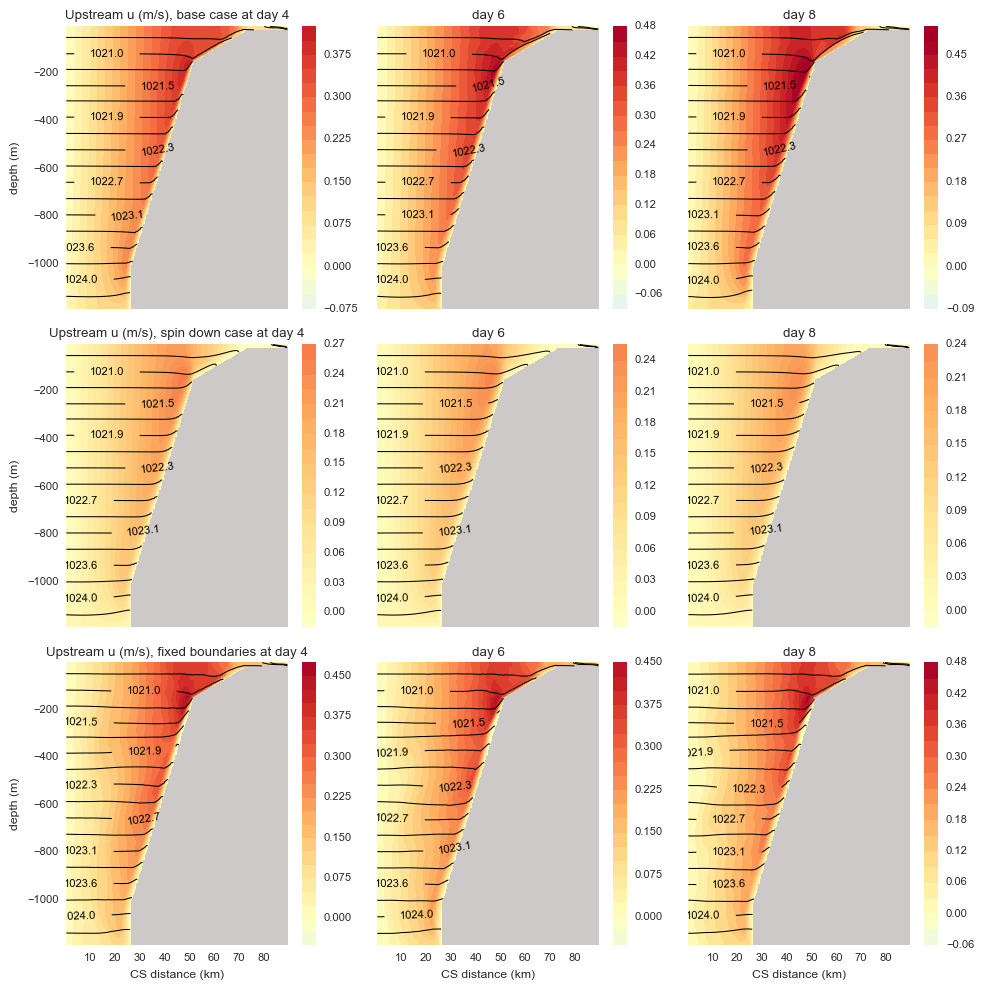

In [13]:
sns.set_context('paper')
sns.set_style('dark')

yslice=slice(0,360)
zslice=slice(0,90)

fig,ax = plt.subplots(3,3,figsize=(10,10), sharey = True, sharex=True)

cf1 = ax[0,0].contourf(grid.Y/1000,grid.RC,ubf_d4,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin=-0.48)
plt.colorbar(cf1,ax = ax[0,0])
plot_isopyc(8,50,ax[0,0],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[0,0].set_title('Upstream u (m/s), base case at day 4')
ax[0,0].set_ylabel('depth (m)')
ax[0,0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf2 = ax[1,0].contourf(grid.Y/1000,grid.RC,u_d4,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin=-0.48)
plt.colorbar(cf2,ax = ax[1,0])
plot_isopyc(8,50,ax[1,0],state_01,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[1,0].set_title('Upstream u (m/s), spin down case at day 4')
ax[1,0].set_ylabel('depth (m)')
ax[1,0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf3 = ax[2,0].contourf(grid.Y/1000,grid.RC,uEW_d4,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin=-0.48)
plt.colorbar(cf3,ax = ax[2,0])
plot_isopyc(8,50,ax[2,0],state_fix,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[2,0].set_title('Upstream u (m/s), fixed boundaries at day 4')
ax[2,0].set_xlabel('CS distance (km)')
ax[2,0].set_ylabel('depth (m)')
ax[2,0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf4 = ax[0,1].contourf(grid.Y/1000,grid.RC,ubf_d6,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin=-0.48)
plt.colorbar(cf4,ax = ax[0,1])
plot_isopyc(12,50,ax[0,1],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[0,1].set_title('day 6')
ax[0,1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))


cf5 = ax[1,1].contourf(grid.Y/1000,grid.RC,u_d6,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin=-0.48)
plt.colorbar(cf5,ax = ax[1,1])
plot_isopyc(12,50,ax[1,1],state_01,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[1,1].set_title('day 6')
ax[1,1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))


cf6 = ax[2,1].contourf(grid.Y/1000,grid.RC,uEW_d6,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin=-0.48)
plt.colorbar(cf6,ax = ax[2,1])
plot_isopyc(12,50,ax[2,1],state_fix,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[2,1].set_title('day 6')
ax[2,1].set_xlabel('CS distance (km)')
ax[2,1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf7 = ax[0,2].contourf(grid.Y/1000,grid.RC,ubf_d8,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin = -0.48)
plt.colorbar(cf7,ax = ax[0,2])
plot_isopyc(16,50,ax[0,2],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[0,2].set_title('day 8')
ax[0,2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))


cf8 = ax[1,2].contourf(grid.Y/1000,grid.RC,u_d8,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin = -0.48)
plt.colorbar(cf8,ax = ax[1,2])
plot_isopyc(16,50,ax[1,2],state_01,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[1,2].set_title('day 8')
ax[1,2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))


cf9 = ax[2,2].contourf(grid.Y/1000,grid.RC,uEW_d8,20, cmap = 'RdYlBu_r', vmax = 0.48, vmin = -0.48)
plt.colorbar(cf9,ax = ax[2,2])
plot_isopyc(16,50,ax[2,2],state_fix,yslice,zslice,rho_min=1020.4,rho_max=1024.4)
ax[2,2].set_title('day 8')
ax[2,2].set_xlabel('CS distance (km)')
ax[2,2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))


plt.tight_layout()
#plt.savefig('U_cross_shelf.eps',format='eps',bbox_inches='tight')

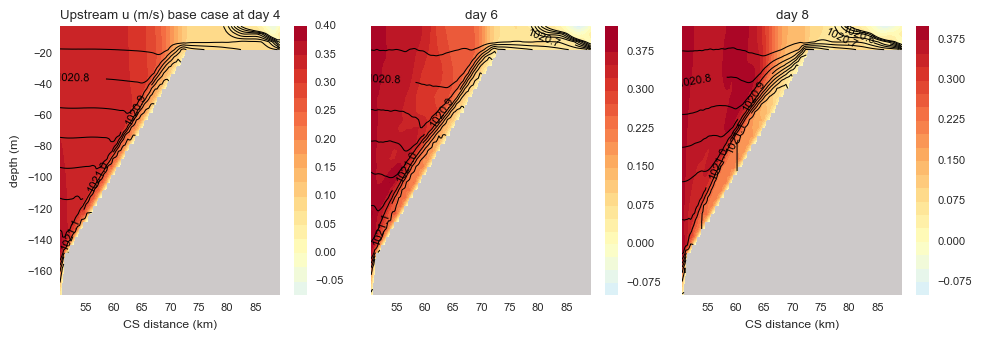

In [19]:
sns.set_context('paper')
sns.set_style('dark')

yslice=slice(220,359)
zslice=slice(0,35)

fig,ax = plt.subplots(1,3,figsize=(10,3.5), sharey = True, sharex=True)

cf1 = ax[0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],ubf_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf1,ax = ax[0])
plot_isopyc(8,50,ax[0],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[0].set_title('Upstream u (m/s) base case at day 4')
ax[0].set_ylabel('depth (m)')
ax[0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[0].set_xlabel('CS distance (km)')

cf4 = ax[1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],ubf_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf4,ax = ax[1])
plot_isopyc(12,50,ax[1],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[1].set_title('day 6')
ax[1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[2].set_xlabel('CS distance (km)')

cf7 = ax[2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],ubf_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin = -.40)
plt.colorbar(cf7,ax = ax[2])
plot_isopyc(16,50,ax[2],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[2].set_title('day 8')
ax[2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

ax[2].set_xlabel('CS distance (km)')
ax[2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

plt.tight_layout()
#plt.savefig('IncomingU_zoom_shelf_baseOnly.eps',format='eps',bbox_inches='tight')

In [ ]:
sns.set_context('paper')
sns.set_style('dark')

yslice=slice(220,359)
zslice=slice(0,35)

fig,ax = plt.subplots(3,3,figsize=(10,10), sharey = True, sharex=True)

cf1 = ax[0,0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],ubf_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf1,ax = ax[0,0])
plot_isopyc(8,50,ax[0,0],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[0,0].set_title('Upstream u (m/s) base case at day 4')
ax[0,0].set_ylabel('depth (m)')
ax[0,0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf2 = ax[1,0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],u_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf2,ax = ax[1,0])
plot_isopyc(8,50,ax[1,0],state_01,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[1,0].set_title('Upstream u (m/s), spin down case at day 4')
ax[1,0].set_ylabel('depth (m)')
ax[0,0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf3 = ax[2,0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],uEW_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf3,ax = ax[2,0])
plot_isopyc(8,50,ax[2,0],state_fix,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[2,0].set_title('Upstream u (m/s), fixed boundaries at day 4')
ax[2,0].set_xlabel('CS distance (km)')
ax[2,0].set_ylabel('depth (m)')
ax[2,0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf4 = ax[0,1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],ubf_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf4,ax = ax[0,1])
plot_isopyc(12,50,ax[0,1],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[0,1].set_title('day 6')
ax[0,1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf5 = ax[1,1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],u_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf5,ax = ax[1,1])
plot_isopyc(12,50,ax[1,1],state_01,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[1,1].set_title('day 6')
ax[1,1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf6 = ax[2,1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],uEW_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin=-.40)
plt.colorbar(cf6,ax = ax[2,1])
plot_isopyc(12,50,ax[2,1],state_fix,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[2,1].set_title('day 6')
ax[2,1].set_xlabel('CS distance (km)')
ax[2,1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf7 = ax[0,2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],ubf_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin = -.40)
plt.colorbar(cf7,ax = ax[0,2])
plot_isopyc(16,50,ax[0,2],state_bf,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[0,2].set_title('day 8')
ax[0,2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf8 = ax[1,2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],u_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin = -.40)
plt.colorbar(cf8,ax = ax[1,2])
plot_isopyc(16,50,ax[1,2],state_01,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[1,2].set_title('day 8')
ax[1,2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

cf9 = ax[2,2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],uEW_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .40, vmin = -.40)
plt.colorbar(cf9,ax = ax[2,2])
plot_isopyc(16,50,ax[2,2],state_fix,yslice,zslice,rho_min=1020.4,rho_max=1021.4)
ax[2,2].set_title('day 8')
ax[2,2].set_xlabel('CS distance (km)')
ax[2,2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

plt.tight_layout()
#plt.savefig('IncomingU_zoom_shelf.eps',format='eps',bbox_inches='tight')

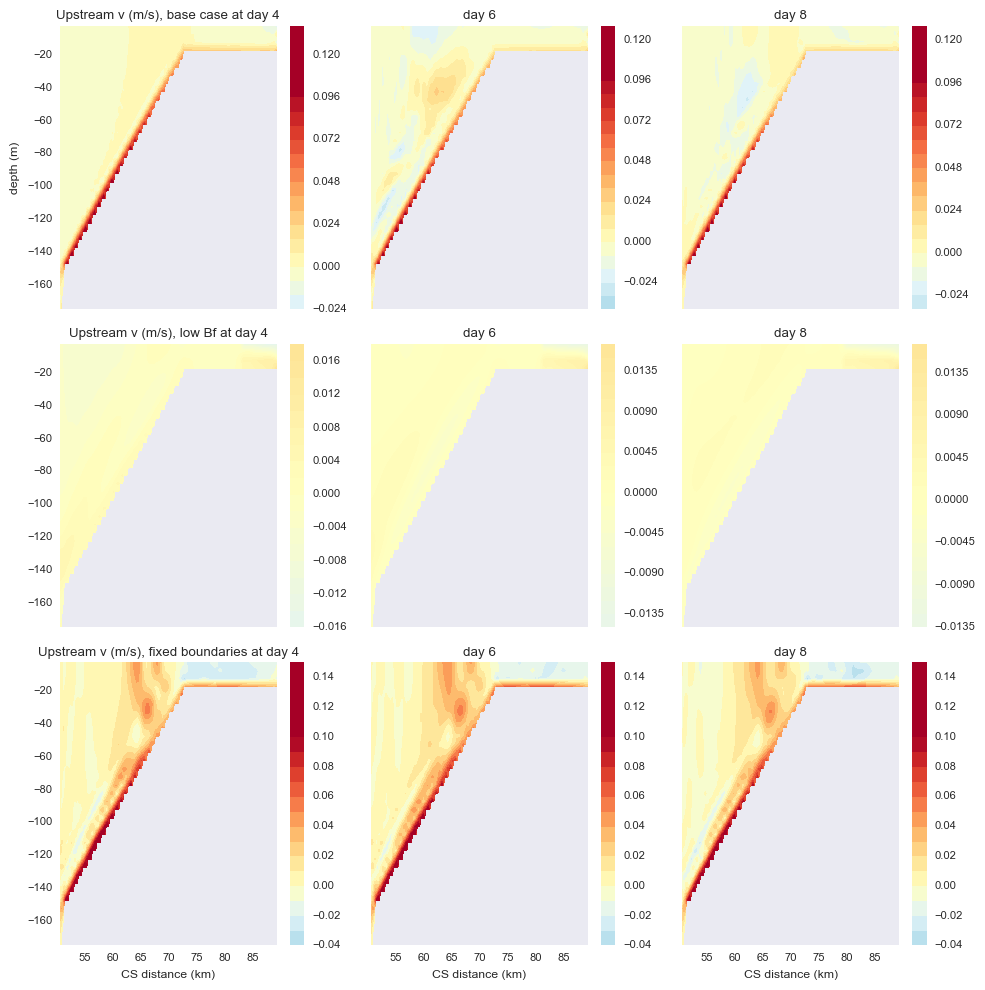

In [114]:
sns.set_context('paper')
sns.set_style('dark')
fig,ax = plt.subplots(3,3,figsize=(10,10), sharey = True, sharex=True)

cf1 = ax[0,0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],vbf_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin=-.10)
plt.colorbar(cf1,ax = ax[0,0])
ax[0,0].set_title('Upstream v (m/s), base case at day 4')
ax[0,0].set_ylabel('depth (m)')

cf2 = ax[1,0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],v_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin=-.10)
plt.colorbar(cf2,ax = ax[1,0])
ax[1,0].set_title('Upstream v (m/s), low Bf at day 4')
ax[0,0].set_ylabel('depth (m)')

cf3 = ax[2,0].contourf(grid.Y[220:359]/1000,grid.RC[0:35],vEW_d4[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin=-.10)
plt.colorbar(cf3,ax = ax[2,0])
ax[2,0].set_title('Upstream v (m/s), fixed boundaries at day 4')
ax[2,0].set_xlabel('CS distance (km)')
ax[0,0].set_ylabel('depth (m)')

cf4 = ax[0,1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],vbf_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin=-.10)
plt.colorbar(cf4,ax = ax[0,1])
ax[0,1].set_title('day 6')


cf5 = ax[1,1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],v_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin=-.10)
plt.colorbar(cf5,ax = ax[1,1])
ax[1,1].set_title('day 6')


cf6 = ax[2,1].contourf(grid.Y[220:359]/1000,grid.RC[0:35],vEW_d6[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin=-.10)
plt.colorbar(cf6,ax = ax[2,1])
ax[2,1].set_title('day 6')
ax[2,1].set_xlabel('CS distance (km)')

cf7 = ax[0,2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],vbf_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin = -.10)
plt.colorbar(cf7,ax = ax[0,2])
ax[0,2].set_title('day 8')


cf8 = ax[1,2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],v_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin = -.10)
plt.colorbar(cf8,ax = ax[1,2])
ax[1,2].set_title('day 8')


cf9 = ax[2,2].contourf(grid.Y[220:359]/1000,grid.RC[0:35],vEW_d8[0:35,220:359],20, cmap = 'RdYlBu_r', vmax = .10, vmin = -.10)
plt.colorbar(cf9,ax = ax[2,2])
ax[2,2].set_title('day 8')
ax[2,2].set_xlabel('CS distance (km)')


plt.tight_layout()


## Incoming U velocity for different forcing cases

In [115]:
# Find land mask
hFacmasked = np.ma.masked_values(grid.HFacW.data, 0)
MaskC = np.ma.getmask(hFacmasked)


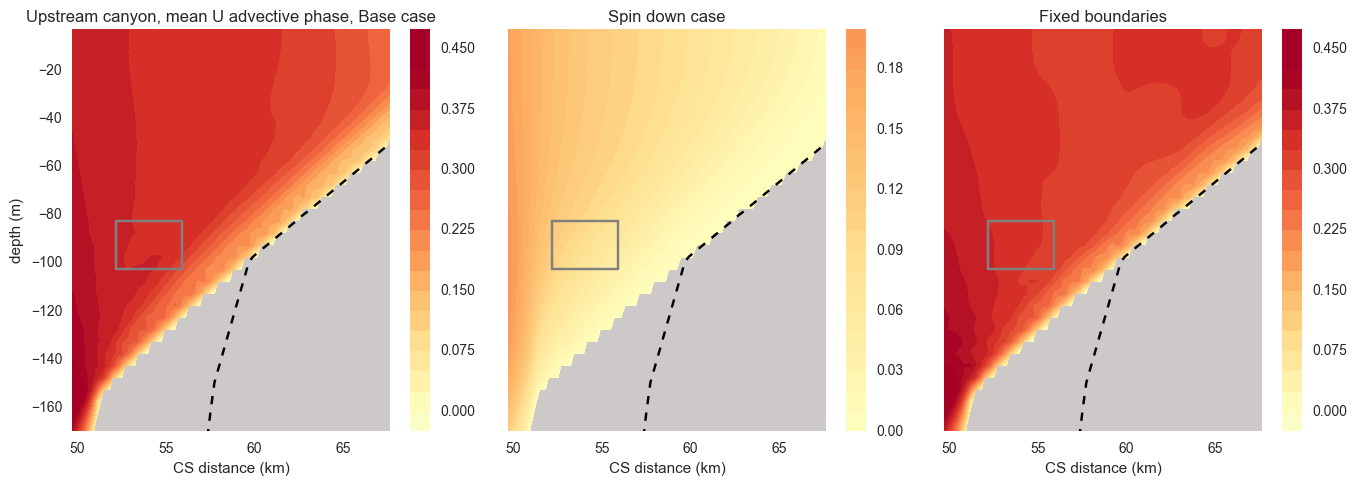

In [21]:
sns.set_context('notebook')
sns.set_style('dark')
fig,ax = plt.subplots(1,3,figsize=(14,5), sharey = True)

cf1 = ax[0].contourf(grid.Y[215:300]/1000,grid.RC[0:35],
                     np.ma.array(state_bf.U.isel(Xp1=120,T=slice(8,19),Z=slice(0,35),Y=slice(215,300)).mean(axis=0).data,
                                 mask=maskW[0:35,215:300,120]),
                     20, 
                     cmap = 'RdYlBu_r', 
                     vmax = 0.42, 
                     vmin = -0.42,
                    )
plt.colorbar(cf1,ax = ax[0])
cnt = ax[0].plot(grid.Y[215:300]/1000,-grid.Depth[215:300,180],'k--')
ax[0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[0].set_title('Upstream canyon, mean U advective phase, Base case')
ax[0].set_xlabel('CS distance (km)')
ax[0].set_ylabel('depth (m)')

cf2 = ax[1].contourf(grid.Y[215:300]/1000,grid.RC[0:35],
                     np.ma.array(state_01.U.isel(Xp1=120,T=slice(8,19),Z=slice(0,35),Y=slice(215,300)).mean(axis=0).data,
                                 mask=maskW[0:35,215:300,120]),
                     20, 
                     cmap = 'RdYlBu_r',
                     vmax = 0.42, 
                     vmin = -0.42,
                    )
plt.colorbar(cf2,ax = ax[1])
cnt = ax[1].plot(grid.Y[215:300]/1000,-grid.Depth[215:300,180],'k--')
ax[1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[1].set_title('Spin down case')
ax[1].set_xlabel('CS distance (km)')

cf3 = ax[2].contourf(grid.Y[215:300]/1000,grid.RC[0:35],
                      np.ma.array(state_fix.U.isel(Xp1=120, T=slice(8,19),Z=slice(0,35),Y=slice(215,300)).mean(axis=0).data,
                                 mask=maskW[0:35,215:300,120]),
                     20,
                     cmap = 'RdYlBu_r',
                     vmax = 0.42,
                     vmin = -0.42,
                    )
plt.colorbar(cf3,ax = ax[2])
cnt = ax[2].plot(grid.Y[215:300]/1000,-grid.Depth[215:300,180],'k--')
ax[2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[2].set_title('Fixed boundaries')
ax[2].set_xlabel('CS distance (km)')

ax[0].plot(grid.Y[230:251]/1000,(grid.RC[20].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[0].plot(grid.Y[230:251]/1000,(grid.RC[16].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[0].plot(((grid.Y[230]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')
ax[0].plot(((grid.Y[250]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')

ax[1].plot(grid.Y[230:251]/1000,(grid.RC[20].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[1].plot(grid.Y[230:251]/1000,(grid.RC[16].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[1].plot(((grid.Y[230]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')
ax[1].plot(((grid.Y[250]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')

ax[2].plot(grid.Y[230:251]/1000,(grid.RC[20].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[2].plot(grid.Y[230:251]/1000,(grid.RC[16].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[2].plot(((grid.Y[230]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')
ax[2].plot(((grid.Y[250]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')

plt.ylim(-170,-2.5)
plt.tight_layout()

plt.savefig('IncomingU_meanAdvPhase_CSstructure_3forcings.eps',format='eps',bbox_inches='tight')

This plots show a cross-shelf section upstream of the canyon (xi=120) of the alongshore velocity, U (positive out of the page), averaged over the advective phase (days 4-9) for the base case, low body forcing case and fixed boundaries case. The dotted line is the shelf depth along the canyon axis (xi=180).

The gray rectangle is a somewhat arbitrary selection of a cross section over which to average U, to get useful scale. The only restriction is that I care about the velocity approximately between the shelf location of head and mouth since the pressure gradient we need is between this points.

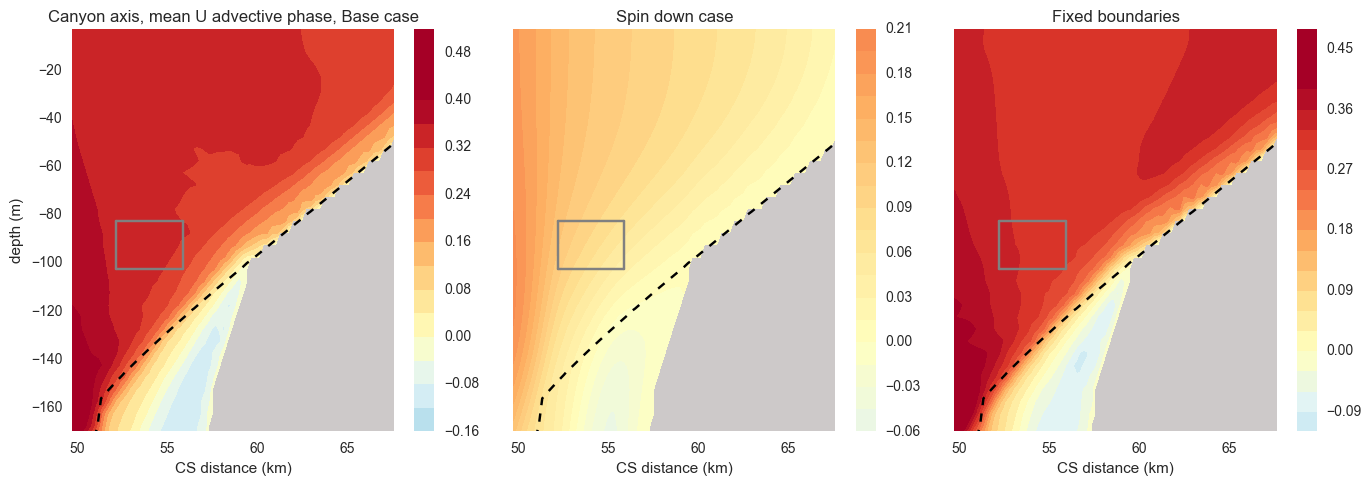

In [22]:
sns.set_context('notebook')
sns.set_style('dark')
fig,ax = plt.subplots(1,3,figsize=(14,5), sharey = True)

cf1 = ax[0].contourf(grid.Y[215:300]/1000,grid.RC[0:35],
                     np.ma.array(state_bf.U.isel(Xp1=180,T=slice(8,19),Z=slice(0,35),Y=slice(215,300)).mean(axis=0).data,
                                 mask=MaskC[0:35,215:300,180]),
                     20, 
                     cmap = 'RdYlBu_r', 
                     vmax = 0.4, 
                     vmin = -0.4,
                    )
plt.colorbar(cf1,ax = ax[0])
cnt = ax[0].plot(grid.Y[215:300]/1000,-grid.Depth[215:300,120],'k--')
ax[0].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[0].set_title('Canyon axis, mean U advective phase, Base case')
ax[0].set_xlabel('CS distance (km)')
ax[0].set_ylabel('depth (m)')

cf2 = ax[1].contourf(grid.Y[215:300]/1000,grid.RC[0:35],
                     np.ma.array(state_01.U.isel(Xp1=180,T=slice(8,19),Z=slice(0,35),Y=slice(215,300)).mean(axis=0).data,
                                 mask=MaskC[0:35,215:300,180]),
                     20, 
                     cmap = 'RdYlBu_r',
                     vmax = 0.4, 
                     vmin = -0.4,
                    )
plt.colorbar(cf2,ax = ax[1])
cnt = ax[1].plot(grid.Y[215:300]/1000,-grid.Depth[215:300,120],'k--')
ax[1].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[1].set_title('Spin down case')
ax[1].set_xlabel('CS distance (km)')

cf3 = ax[2].contourf(grid.Y[215:300]/1000,grid.RC[0:35],
                      np.ma.array(state_fix.U.isel(Xp1=180,T=slice(8,19),Z=slice(0,35),Y=slice(215,300)).mean(axis=0).data,
                                 mask=MaskC[0:35,215:300,180]),
                     20,
                     cmap = 'RdYlBu_r',
                     vmax = 0.4,
                     vmin = -0.4,
                    )
plt.colorbar(cf3,ax = ax[2])
cnt = ax[2].plot(grid.Y[215:300]/1000,-grid.Depth[215:300,120],'k--')
ax[2].set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
ax[2].set_title('Fixed boundaries')
ax[2].set_xlabel('CS distance (km)')

ax[0].plot(grid.Y[230:251]/1000,(grid.RC[20].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[0].plot(grid.Y[230:251]/1000,(grid.RC[16].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[0].plot(((grid.Y[230]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')
ax[0].plot(((grid.Y[250]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')

ax[1].plot(grid.Y[230:251]/1000,(grid.RC[20].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[1].plot(grid.Y[230:251]/1000,(grid.RC[16].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[1].plot(((grid.Y[230]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')
ax[1].plot(((grid.Y[250]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')

ax[2].plot(grid.Y[230:251]/1000,(grid.RC[20].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[2].plot(grid.Y[230:251]/1000,(grid.RC[16].data)*np.ones(np.shape(grid.Y[230:251])),color='0.5')
ax[2].plot(((grid.Y[230]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')
ax[2].plot(((grid.Y[250]/1000).data)*np.ones(np.shape(grid.RC[16:21])),grid.RC[16:21],color='0.5')

plt.ylim(-170,-2.5)
plt.tight_layout()


This plots show a cross-shelf section along the canyon axis (xi=180) of the alongshore velocity, U (positive out of the page), averaged over the advective phase (days 4-9) for the base case, low body forcing case and fixed boundaries case. The dotted line is the shelf depth away from the canyon. 


In [123]:
U_in_lowbf = state_low.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_base = state_bf.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_fix = state_fix.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))
U_in_spn = state_01.U.isel(Xp1=120, Z=slice(16,21),Y=slice(230,251))

Ulow = np.sqrt(((state_low.U.isel(T=slice(8,20),Xp1=120, Z=slice(16,21),Y=slice(230,251)).data)**2).mean())
Uspn = np.sqrt(((state_01.U.isel(T=slice(8,20),Xp1=120, Z=slice(16,21),Y=slice(230,251)).data)**2).mean())
Ubase = np.sqrt(((state_bf.U.isel(T=slice(8,20),Xp1=120, Z=slice(16,21),Y=slice(230,251)).data)**2).mean())
Ufix = np.sqrt(((state_fix.U.isel(T=slice(8,20),Xp1=120, Z=slice(16,21),Y=slice(230,251)).data)**2).mean())

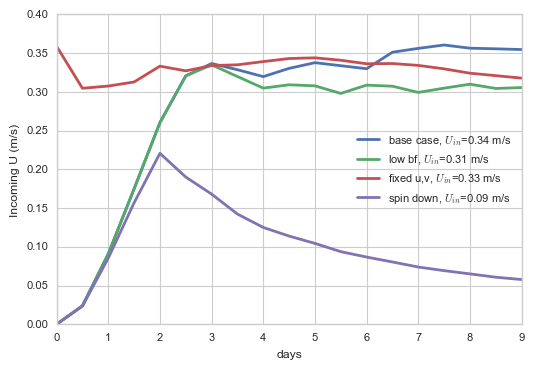

In [124]:
sns.set_context('paper')
sns.set_style('whitegrid')
fig,ax = plt.subplots(1,1,figsize=(6,4), sharey = True)

ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_base,axis=1),axis=1),linewidth=2,label='base case, $U_{in}$=%0.2f m/s' %Ubase)
ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_lowbf,axis=1),axis=1),linewidth=2,label='low bf, $U_{in}$=%0.2f m/s' %Ulow )
ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_fix,axis=1),axis=1),linewidth=2,label='fixed u,v, $U_{in}$=%0.2f m/s' %Ufix)
ax.plot(np.linspace(0,9,19),np.mean(np.mean(U_in_spn,axis=1),axis=1),linewidth=2,label='spin down, $U_{in}$=%0.2f m/s' %Uspn)

ax.set_ylabel('Incoming U (m/s)')
ax.set_xlabel('days')
ax.legend(loc=0)
#plt.savefig('IncomingU.eps',format='eps',bbox_inches='tight')

The plot above shows u averaged over the gray square defined above for 4 different forcings. During the first 3 days the current is setting up. Afetrwards, low bf has half the body forcing of the base case. The rms of incomming U's during the advective phase (from day 4 on) for each case are:

U Base : 0.34 m/s

U Fixed boundaries: 0.33 m/s

U Low body forcing: 0.31 m/s

U spin down: 0.09 m/s